In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from functions.functions_under_study import f_trend, predict, loss_func, grad_func, hess_func, jacob_func
from functions.optimization import newton, gauss_newton, dfp

Формируем синтетический датасет на основе полиномиальной функции с добавлением случайного шума ${\epsilon}$:

${f(x) = \sum_{k=0}^{K-1}{w_k \cdot x^k} + \epsilon}$,

где ${w}$ - массив весов размера ${K}$.

<function matplotlib.pyplot.show(close=None, block=None)>

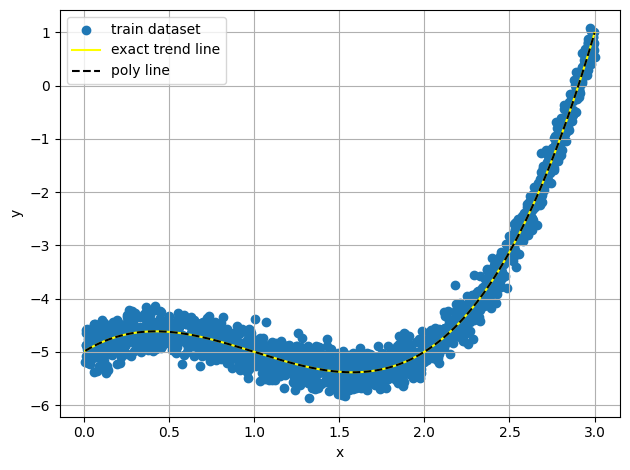

In [3]:
w_target = np.array([-5, 2, -3, 1, 0])
K = len(w_target)

x_min = 0
x_max = 3
N_points = 2000
# Случайный набор X-ов.
np.random.seed(42)
X_train = np.random.uniform(low=x_min, high=x_max, size=(N_points,))
X_train_vander = np.vander(X_train, K, increasing=True)
X_train_vander_plt = np.vander(np.sort(X_train), K, increasing=True)

# Отклики с добавлением шума.
y_train = f_trend(X_train) + np.random.normal(0,0.2,N_points)

plt.scatter(X_train, y_train)
plt.plot(np.sort(X_train), f_trend(np.sort(X_train)), color='yellow')
plt.plot(np.sort(X_train), predict(X_train_vander_plt, w_target), '--', color='black')
plt.grid()
plt.legend(['train dataset', 'exact trend line', 'poly line'])
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
#plt.savefig('plots/dataset_plot.png')
plt.show

In [4]:
w_init = np.random.uniform(low=-10, high=10, size=(K,))
w_init

array([ 1.98598574,  0.2741571 , -4.23630948, -9.87071284, -0.07521556])

In [5]:
newton(X_train_vander, y_train, w_init, tolerance=1e-15)

(array([-4.99321178,  1.91702032, -2.87442044,  0.93980324,  0.00918756]),
 [np.float64(6805.083844769087),
  np.float64(0.019996312730525496),
  np.float64(0.01999631273052549),
  np.float64(0.019996312730525496),
  np.float64(0.019996312730525496),
  np.float64(0.019996312730525493),
  np.float64(0.019996312730525496),
  np.float64(0.019996312730525493),
  np.float64(0.019996312730525496),
  np.float64(0.019996312730525496)],
 9,
 10,
 9,
 9,
 0)

In [6]:
w_target

array([-5,  2, -3,  1,  0])

In [7]:
gauss_newton(X_train_vander, y_train, w_init, tolerance=1e-15)

(array([-4.99321178,  1.91702032, -2.87442044,  0.93980324,  0.00918756]),
 [np.float64(6805.083844769087),
  np.float64(0.019996312730525496),
  np.float64(0.019996312730525496),
  np.float64(0.01999631273052549),
  np.float64(0.019996312730525493),
  np.float64(0.01999631273052549),
  np.float64(0.019996312730525496),
  np.float64(0.019996312730525493),
  np.float64(0.01999631273052551),
  np.float64(0.01999631273052551),
  np.float64(0.0199963127305255),
  np.float64(0.019996312730525496),
  np.float64(0.019996312730525493),
  np.float64(0.019996312730525503),
  np.float64(0.019996312730525493),
  np.float64(0.01999631273052549),
  np.float64(0.019996312730525496),
  np.float64(0.019996312730525503),
  np.float64(0.019996312730525496),
  np.float64(0.019996312730525493),
  np.float64(0.019996312730525503),
  np.float64(0.019996312730525496),
  np.float64(0.0199963127305255),
  np.float64(0.019996312730525496),
  np.float64(0.01999631273052549),
  np.float64(0.01999631273052549),
  n

In [8]:
w_dfp, _, counter, _, _, _, _= dfp(X_train_vander, y_train, w_init, tolerance=1e-5)
print(w_dfp)
print(counter)

condition -8573615616069.441
condition -8573615616069.441
condition -8573615616069.441
condition -8573615616069.441
condition -8573615616069.441
condition -8573615616069.441
condition -8573615616069.441
condition -8573615616069.441
condition -8573615616069.441
condition -8573615616069.441
condition -8573615616069.441
condition -8573615616069.441
condition -8573615616069.441
condition -8573615616069.441
condition -8573615616069.441
condition -8573615616069.441
condition -8573615616069.441
condition -8573615616069.441
condition -8573615616069.441
condition -8573615616069.441
condition -8573615616069.441
condition -8573615616069.441
condition -8573615616069.441
condition -8573615616069.441
condition -8573615616069.441
condition -8573615616069.441
condition -8573615616069.441
condition -8573615616069.441
condition -8573615616069.441
condition -8573615616069.441
condition -8573615616069.441
condition -8573615616069.441
condition -8573615616069.441
condition -8573615616069.441
condition -857

KeyboardInterrupt: 

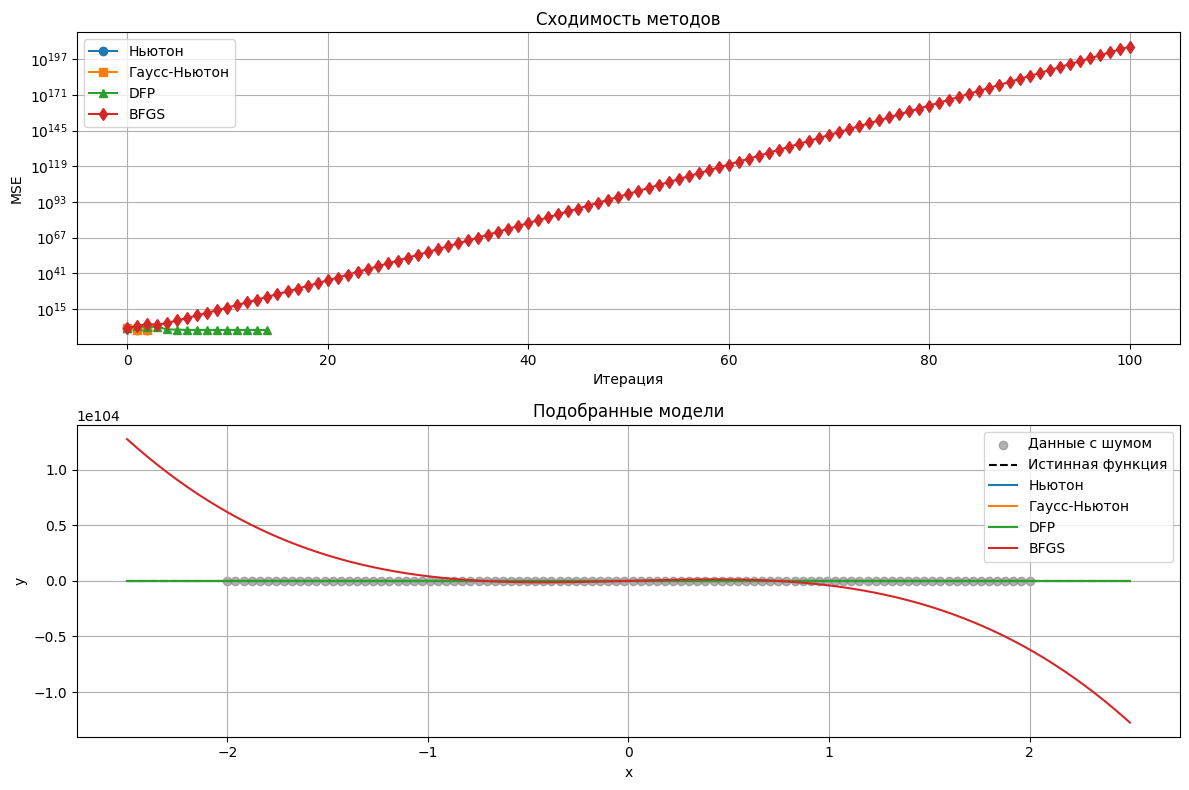

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(losses_newton, label='Ньютон', marker='o')
plt.plot(losses_gn, label='Гаусс-Ньютон', marker='s')
plt.plot(losses_dfp, label='DFP', marker='^')
plt.plot(losses_bfgs, label='BFGS', marker='d')
plt.yscale('log')
plt.xlabel('Итерация')
plt.ylabel('MSE')
plt.title('Сходимость методов')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
x_plot = np.linspace(-2.5, 2.5, 200)
X_plot = polynomial_features(x_plot, degree)
y_plot_newton = predict(X_plot, w_newton)
y_plot_gn = predict(X_plot, w_gn)
y_plot_dfp = predict(X_plot, w_dfp)
y_plot_bfgs = predict(X_plot, w_bfgs)
y_true_plot = 2 + 3*x_plot + 1.5*x_plot**2 - 0.5*x_plot**3

plt.scatter(x, y, color='gray', alpha=0.6, label='Данные с шумом')
plt.plot(x_plot, y_true_plot, 'k--', label='Истинная функция')
plt.plot(x_plot, y_plot_newton, label='Ньютон')
plt.plot(x_plot, y_plot_gn, label='Гаусс-Ньютон')
plt.plot(x_plot, y_plot_dfp, label='DFP')
plt.plot(x_plot, y_plot_bfgs, label='BFGS')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Подобранные модели')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
plt.plot(losses_1, color='magenta', linestyle='--', linewidth=2)
plt.plot(losses_2, color='orange', linestyle='-.', linewidth=2)
plt.plot(losses_3, color='blue', linestyle='--', linewidth=2)
plt.plot(losses_4, color='green', linestyle='-', linewidth=2)
plt.plot(losses_5, color='brown', linestyle='--', linewidth=1)
plt.plot(losses_6, color='red', linestyle=':', linewidth=2)
plt.ylim(70,500)
plt.legend(['lr=[5e-7, 5e-7, 5e-7, 5e-7, 5e-7], batch=1.0, beta=0.0',
            'lr=[1e-5, 1e-6, 1e-7, 1e-8, 1e-9], batch=1.0, beta=0.0',
            'lr=[1e-3, 1e-4, 1e-5, 1e-6, 1e-7], batch=0.1, beta=0.0',
            'lr=[1e-3, 1e-4, 1e-5, 1e-6, 1e-7], batch=0.1, beta=0.8',
            'lr=[1e-3, 1e-4, 1e-5, 1e-6, 1e-7], batch=0.1, beta=0.4',
            'lr=[1e-3, 1e-4, 1e-5, 1e-6, 1e-7], batch=0.2, beta=0.0'])
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show

In [ ]:
legend_list =  ['lr=[5e-7, 5e-7, 5e-7, 5e-7, 5e-7], batch=1.0, beta=0.0',
                'lr=[1e-5, 1e-6, 1e-7, 1e-8, 1e-9], batch=1.0, beta=0.0',
                'lr=[1e-3, 1e-4, 1e-5, 1e-6, 1e-7], batch=0.1, beta=0.0',
                'lr=[1e-3, 1e-4, 1e-5, 1e-6, 1e-7], batch=0.2, beta=0.0']

plt.plot(losses_1, color='magenta', linestyle='--', linewidth=2)
plt.plot(losses_2, color='orange', linestyle='-.', linewidth=2)
plt.plot(losses_3, color='blue', linestyle='--', linewidth=2)
plt.plot(losses_6, color='red', linestyle=':', linewidth=2)
plt.ylim(70,500)
plt.legend(legend_list)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.savefig('plots/MSE_plot.png')
plt.show

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(np.sort(X_train), f_trend(np.sort(X_train)), color='yellow')
plt.plot(np.sort(X_train), f_poly(np.sort(X_train), weights_1), color='magenta', linestyle='--', linewidth=2)
plt.plot(np.sort(X_train), f_poly(np.sort(X_train), weights_2), color='orange', linestyle='-.', linewidth=2)
plt.plot(np.sort(X_train), f_poly(np.sort(X_train), weights_3), color='blue', linestyle='--', linewidth=2)
plt.plot(np.sort(X_train), f_poly(np.sort(X_train), weights_6), color='red', linestyle=':', linewidth=2)
plt.legend(['train dataset', 'exact trend line'] + legend_list)
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('plots/trend_line_plot.png')
plt.show

In [ ]:
fit_time = [fit_time_1, fit_time_2, fit_time_3, fit_time_6]
bar_label = ['Opt. 1', 'Opt. 2', 'Opt. 3', 'Opt. 6']
bar_colors = ['magenta', 'orange', 'blue', 'red']
plt.bar(bar_label, fit_time, color=bar_colors)
plt.ylabel('Time, sec.')
plt.savefig('plots/time_plot.png')
plt.show